# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Sabrina </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy import stats

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake(1).csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [3]:
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
def criar_hemisferio(df):
    df = df["Latitude"]
    if df>0:
        return'Norte'
    else:
        return'Sul'
            
hemisfério = df.apply(criar_hemisferio, axis=1)

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

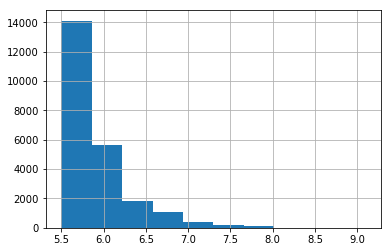

In [5]:
df['Magnitude'].hist()

Quanto maior a magnitude menor o número de incidentes e vice-versa.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [6]:
ex = expon.fit(df['Magnitude'])
ex

(5.4999999996710809, 0.38254864885090978)

loc: onde começa
scale: ??

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

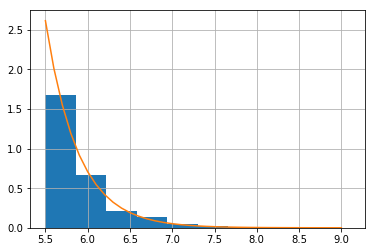

In [7]:
fig, ex = plt.subplots(1, 1)
x = np.arange(df['Magnitude'].min(), df['Magnitude'].max(), 0.1)

a = expon.pdf(x, loc=5.4999999996710809, scale=0.38254864885090978)
b = df['Magnitude'].hist(normed=True)
ex.plot(x, a)

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [8]:
pd.crosstab(hemisfério, df['Type'], normalize=True)

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
row_0,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [9]:
#P(T|N) = P(T ∩ N)/P(N)
#PdeTdadoN = 0.447121/ (0.447121 + 0.000085 + 0.006279 + 0.000000)
#PdeTdadoN
PdeTinterseccaoN = 0.447121

Explique o seu raciocínio:

A probabilidade de ocorrer um terremoto E de ele ter ocorrido no hemisfério norte, é dada por: P(T ∩ N) como está na tabela, ou seja: 0.447121. Assumi aqui que a probabilidade de ocorrer é igual a frequencia do que já ocorreu.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [10]:
#P(NC|N) = P(NC ∩ N)/P(N)
PdeNdadoNC = 0.006279/(0.447121 + 0.000085 + 0.006279 + 0.000000)
PdeNdadoNC

0.013846102958201484

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

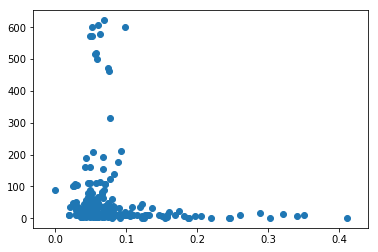

In [11]:
plt.scatter(df['Magnitude Error'],df['Depth'])
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [12]:
#stats.pearsonr(df['Magnitude Error'],df['Depth'])
df['Magnitude Error'].corr(df['Depth'])

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

Significa que Magnitude Error e Depth não são muito correlacionadas, pois é um número próximo de 0

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [16]:
df['Latitude'].describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

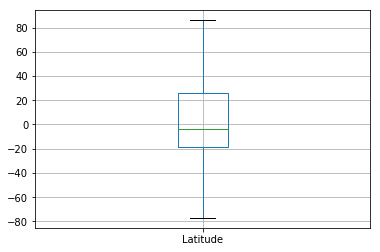

In [14]:
df.boxplot(['Latitude'])

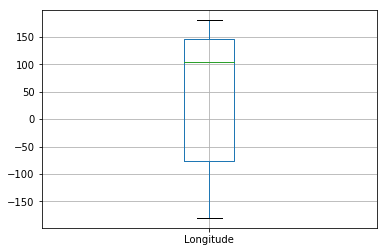

In [15]:
df.boxplot(['Longitude'])

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [32]:
df['Magnitude Type'].iloc('MB')
def Magnitude_Type_MB(df):
    df = df["Magnitude Type"]
    if df=='MB':
        return 'MB'
    else:
        return 0
MT = df.apply(Magnitude_Type_MB, axis=1) 
pd.crosstab(MT, hemisfério, normalize=True)

col_0,Norte,Sul
row_0,,
0,0.381556,0.457799
MB,0.071929,0.088715


In [33]:
df['Type'].iloc('Nuclear Explosion')
def Type_Nuclear_Explosion(df):
    df = df["Type"]
    if df=='Nuclear Explosion':
        return 'Nuclear Explosion'
    else:
        return 0
NE = df.apply(Type_Nuclear_Explosion, axis=1) 
pd.crosstab(NE, hemisfério, normalize=True)

col_0,Norte,Sul
row_0,,
0,0.447207,0.545319
Nuclear Explosion,0.006279,0.001196


A chance de um MB ocorrer no Sul é maior do que de ocorrer no Norte, enquanto que a chance de uma Explosão Nuclear ocorrer no Norte é maior do que de ocorrer no Sul.